In [1]:
%matplotlib inline
%load_ext signature

import random
import helpers
import matplotlib as mpl
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from scipy.misc import imread
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from wordcloud import WordCloud, STOPWORDS


mpl.style.use('dark')
limit = 1000
infosize = 12

title = 'Most frequent words in the canon of Sherlock Holmes'
chartinfo = 'Author: Ramiro Gómez - ramiro.org • Data: The Complete Sherlock Holmes - sherlock-holm.es/ascii/'
footer = 'The {} most frequent words, excluding English stopwords, in the 56 short stories and 4 Sherlock Holmes novels written by Sir Arthur Conan Doyle.\n{}'.format(limit, chartinfo)
font = '/usr/share/fonts/truetype/ubuntu-font-family/Ubuntu-B.ttf'
fontcolor='#fafafa'
bgcolor = '#000000'
english_stopwords = set(stopwords.words('english')) | STOPWORDS | ENGLISH_STOP_WORDS


def grey_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(50, 100)


with open('data/literature/complete-sherlock-holmes-canon.txt') as f:
    text = f.read().lower()

In [4]:
wordcloud = WordCloud(
    max_words=limit,
    stopwords=english_stopwords,
    mask=imread('img/sherlock-holmes-silhouette.png'),
    background_color=bgcolor,
    font_path=font
).generate(text)

/home/rg/anaconda3/envs/dm/lib/python3.4/site-packages/PIL/ImageDraw.py:104: UserWarning: setfont() is deprecated. Please set the attribute directly instead.
  "Please set the attribute directly instead.")


/home/rg/anaconda3/envs/dm/lib/python3.4/site-packages/PIL/ImageDraw.py:104: UserWarning: setfont() is deprecated. Please set the attribute directly instead.
  "Please set the attribute directly instead.")


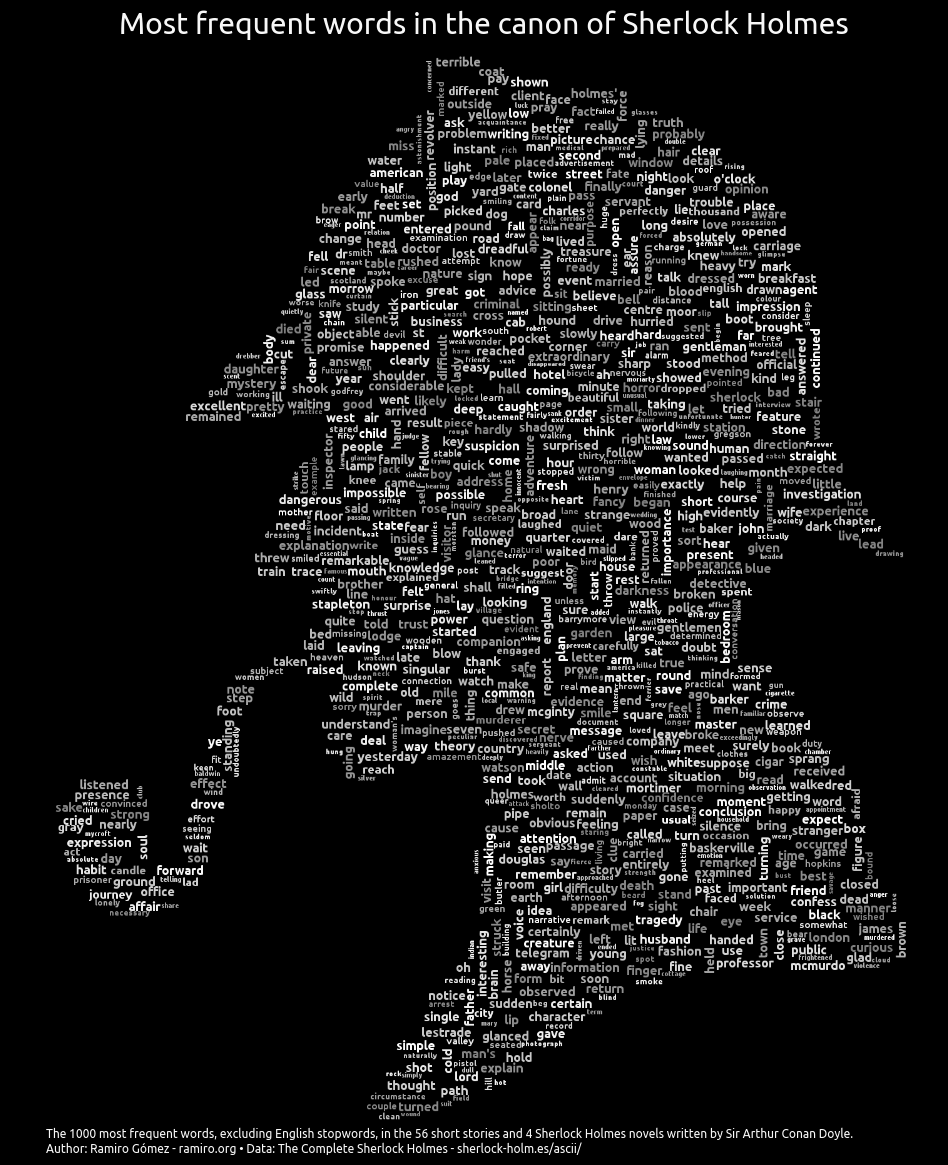

In [5]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud.recolor(color_func=grey_color, random_state=3))
plt.title(title, color=fontcolor, size=30, y=1.01)
plt.annotate(footer, xy=(0, -.025), xycoords='axes fraction', fontsize=infosize, color=fontcolor)
plt.axis('off')
plt.show()

/home/rg/anaconda3/envs/dm/lib/python3.4/site-packages/PIL/ImageDraw.py:104: UserWarning: setfont() is deprecated. Please set the attribute directly instead.
  "Please set the attribute directly instead.")


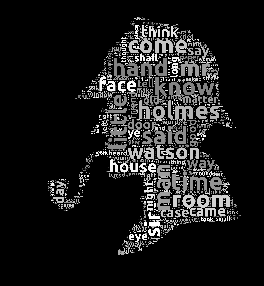

In [7]:
wordcloud = WordCloud(
    max_words=limit,
    stopwords=english_stopwords,
    mask=imread('img/sherlock-holmes-silhouette-large.png'),
    background_color=bgcolor,
    font_path=font,
    max_font_size=500
).generate(text)

plt.imshow(wordcloud.recolor(color_func=grey_color, random_state=3))
plt.axis('off')
plt.show()

wordcloud.to_file('img/sherlock-holmes-canon-wordcloud.png')